# Data Analysis

This notebook performs exploratory data analysis on the WebFormAutocomplete dataset.


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Name    object
 2   Year    int64 
 3   Gender  object
 4   Count   int64 
dtypes: int64(3), object(2)
memory usage: 69.6+ MB
None

First few rows:
   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746

Summary Statistics:
                 Id          Year         Count
count  1.825433e+06  1.825433e+06  1.825433e+06
mean   9.127170e+05  1.972620e+03  1.846879e+02
std    5.269573e+05  3.352891e+01  1.566711e+03
min    1.000000e+00  1.880000e+03  5.000000e+00
25%    4.563590e+05  1.949000e+03  7.000000e+00
50%    9.127170e+05  1.982000e+03  1.200000e+01
75%    1.369075e+06  2.001000e+03  3.200000e+01
max    1.825433e+06  2.014000e+03 

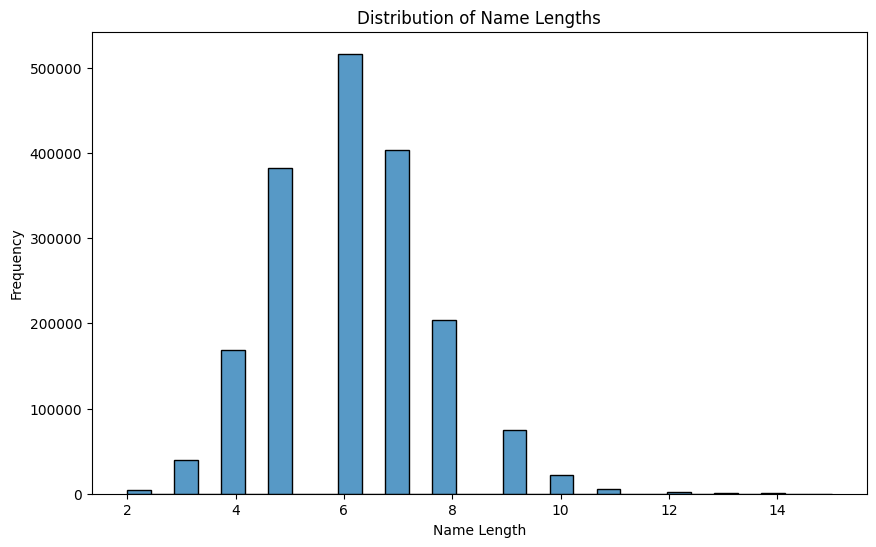

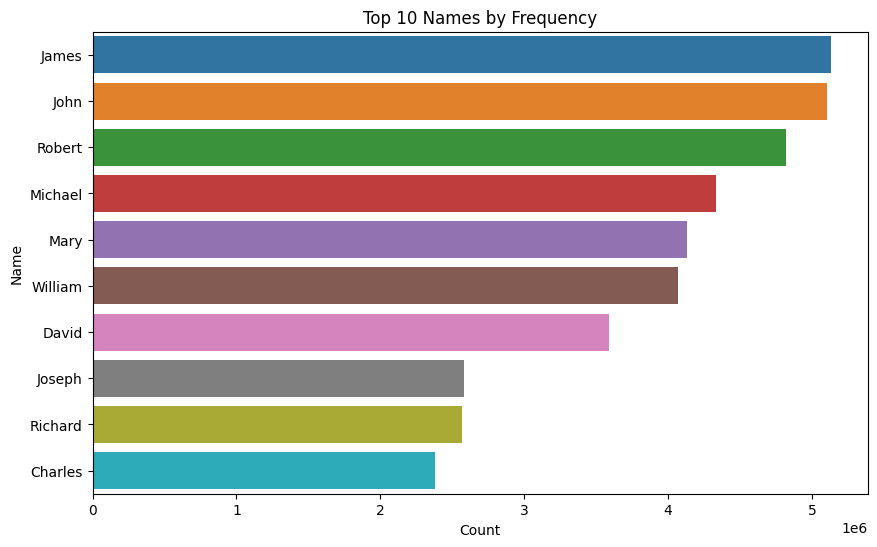

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
try:
    names_df = pd.read_csv('../data/NationalNames.csv')
except FileNotFoundError:
    print("Please download NationalNames.csv from https://www.kaggle.com/datasets/kaggle/us-baby-names and place it in data/raw/")
    names_df = pd.DataFrame()

# Basic info
print("Dataset Info:")
print(names_df.info())
print("\nFirst few rows:")
print(names_df.head())

# Summary statistics
print("\nSummary Statistics:")
print(names_df.describe())

# Name length distribution
if not names_df.empty:
    names_df['NameLength'] = names_df['Name'].str.len()
    plt.figure(figsize=(10, 6))
    sns.histplot(names_df['NameLength'], bins=30)
    plt.title('Distribution of Name Lengths')
    plt.xlabel('Name Length')
    plt.ylabel('Frequency')
    plt.savefig('../docs/name_length_distribution.png')
    plt.show()

    # Top 10 names by count
    top_names = names_df.groupby('Name')['Count'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Count', y=top_names.index, hue=top_names.index, data=top_names.reset_index())
    plt.title('Top 10 Names by Frequency')
    plt.xlabel('Count')
    plt.ylabel('Name')
    plt.savefig('../docs/top_names.png')
    plt.show()
